## Multi Dimensional Data Visualization


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

### Kernel Density Estimation

In [2]:
tdata = pd.read_table("values.txt", header=None, dtype=float, names=["Values"])
tdata

Values
0   1.824378
1   3.446273
2  -0.427239
3   1.952763
4   1.107812
5   0.880768
6   3.022545
7   0.776415
8  -0.249058
9   1.802244
10  3.100371
11 -0.083352
12  1.969301
13  0.328054
14  0.996174
15  1.715757
16  3.271927
17  1.968713
18  1.458442
19  1.762478
20  3.000002
21 -0.168349
22  2.946189
23  1.235000
24  2.831157
25 -0.358687
26 -0.011253
27  0.850426
28  1.932236
29  1.001805
30  3.108471
31  2.051314
32  0.100576
33 -0.181802
34  3.074089
35  1.110291
36  1.008308
37 -0.211590
38  1.872469
39  2.513046

<Axes: ylabel='Density'>

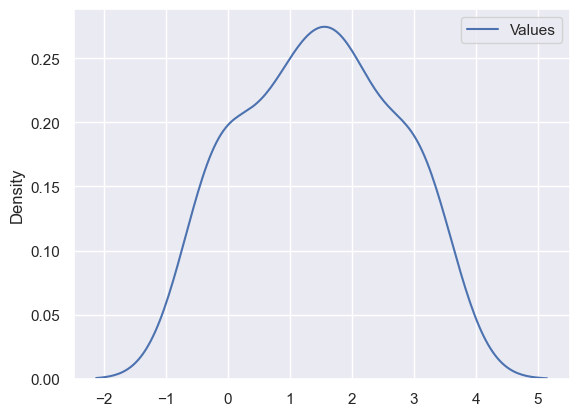

In [3]:
sns.kdeplot(data= tdata)

#### By visualization, we can see that the underlying distributiion has a mode at around 1.5.

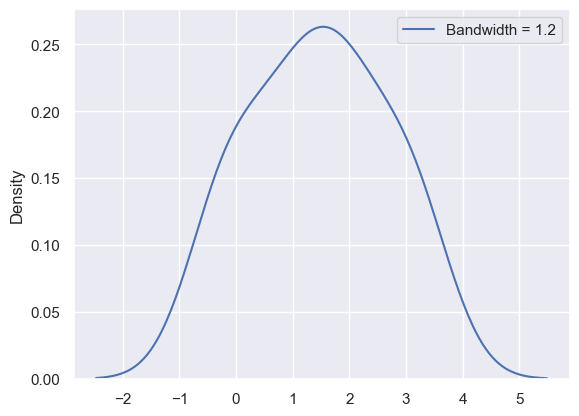

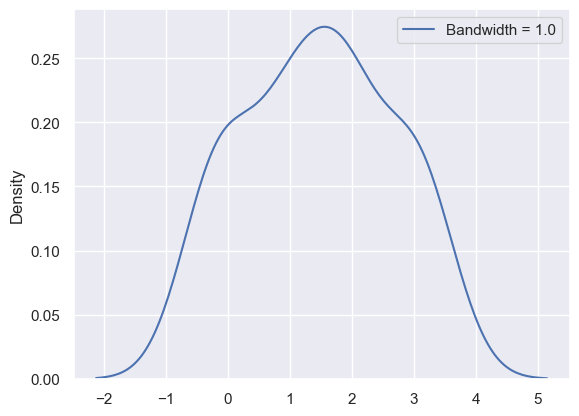

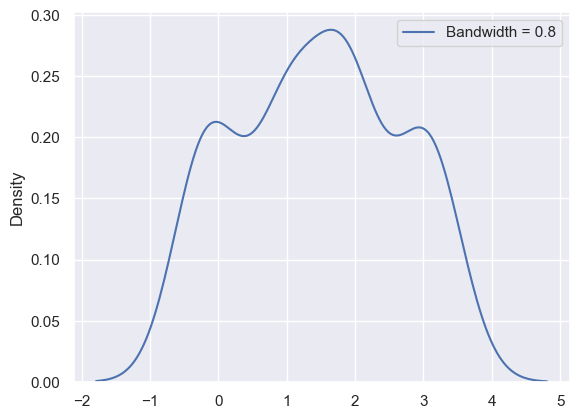

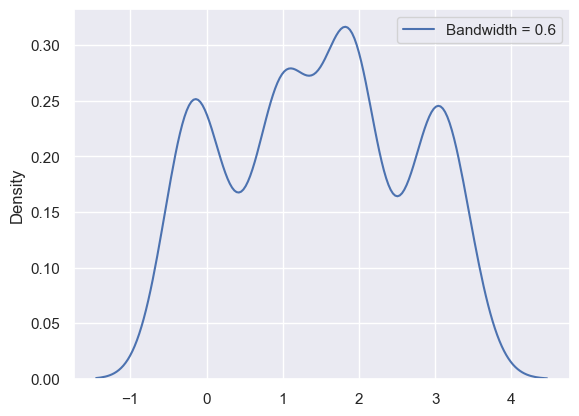

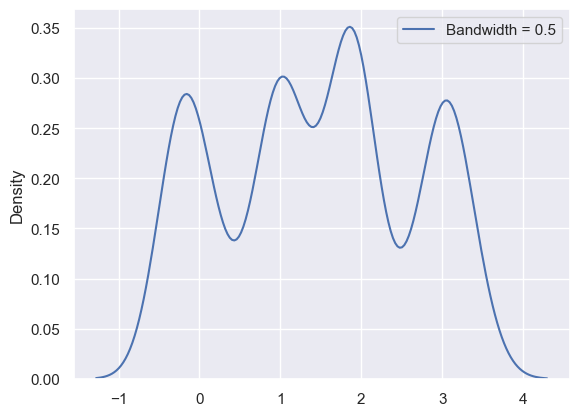

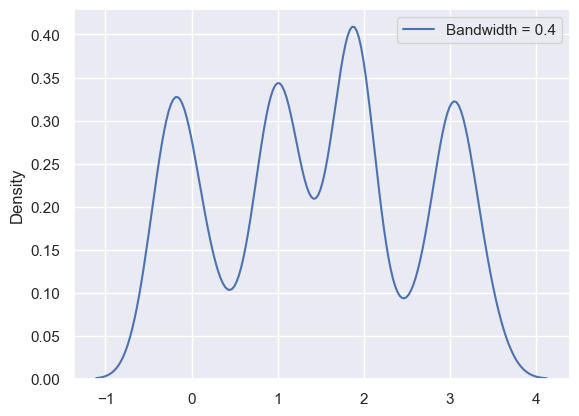

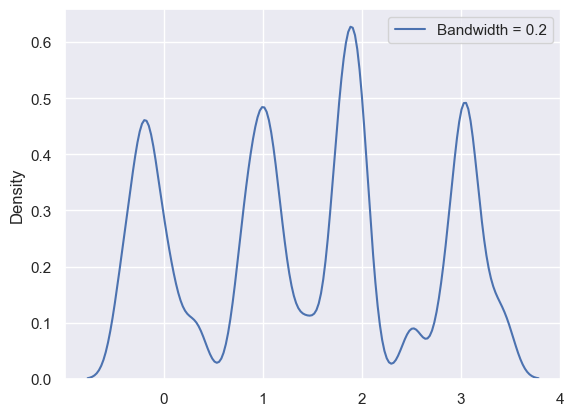

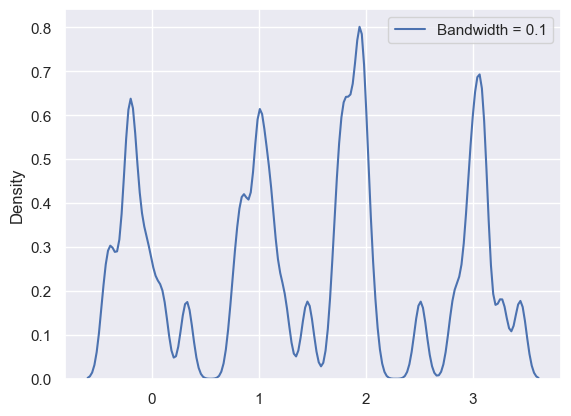

In [4]:
bandwidths = [1.2, 1.0, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1]

for i in bandwidths:
    plt.figure()
    sns.kdeplot(tdata, bw_adjust=i, label=f'Bandwidth = {i:.1f}')
    plt.legend()

#### Observations
From above KDEplots we can see that the bandwidth changes the shape of the estimated distribution greatly.
As bandwidth value decreases, the distribution shape changes from the only one peak to four clear peaks (modes).
The setting with 0.2 bandwidth shows the more precise distribution. From which we can observe that around -0.2, 1, 2, 3 it has the modes.

### Plotting Categorical Data

In [5]:
df2 =pd.read_excel('chronic_kidney_disease_numerical.xls')

In [6]:
df2

age  blood pressure  specific gravity  albumin  sugar  \
0    48.0            80.0             1.020      1.0    0.0   
1     7.0            50.0             1.020      4.0    0.0   
2    62.0            80.0             1.010      2.0    3.0   
3    48.0            70.0             1.005      4.0    0.0   
4    51.0            80.0             1.010      2.0    0.0   
..    ...             ...               ...      ...    ...   
395  55.0            80.0             1.020      0.0    0.0   
396  42.0            70.0             1.025      0.0    0.0   
397  12.0            80.0             1.020      0.0    0.0   
398  17.0            60.0             1.025      0.0    0.0   
399  58.0            80.0             1.025      0.0    0.0   

     blood glucose random  blood urea  serum creatinine  sodium  potassium  \
0                   121.0        36.0               1.2     NaN        NaN   
1                     NaN        18.0               0.8     NaN        NaN   
2                   423.0        53.0               1.8     NaN        NaN   
3                   117.0        56.0               3.8   111.0        2.5   
4                   106.0        26.0               1.4     NaN        NaN   
..                    ...         ...               ...     ...        ...   
395                 140.0        49.0               0.5   150.0        4.9   
396                  75.0        31.0               1.2   141.0        3.5   
397                 100.0        26.0               0.6   137.0        4.4   
398                 114.0        50.0               1.0   135.0        4.9   
399                 131.0        18.0               1.1   141.0        3.5   

     hemoglobin  packed cell volume  white blood cell count  \
0          15.4                44.0                  7800.0   
1          11.3                38.0                  6000.0   
2           9.6                31.0                  7500.0   
3          11.2                32.0                  6700.0   
4          11.6                35.0                  7300.0   
..          ...                 ...                     ...   
395        15.7                47.0                  6700.0   
396        16.5                54.0                  7800.0   
397        15.8                49.0                  6600.0   
398        14.2                51.0                  7200.0   
399        15.8                53.0                  6800.0   

     red blood cell count   class  
0                     5.2     ckd  
1                     NaN     ckd  
2                     NaN     ckd  
3                     3.9     ckd  
4                     4.6     ckd  
..                    ...     ...  
395                   4.9  notckd  
396                   6.2  notckd  
397                   5.4  notckd  
398                   5.9  notckd  
399                   6.1  notckd  

[400 rows x 15 columns]

In [8]:
lm = pd.melt(df2, id_vars=['class'])
lm

class              variable  value
0        ckd                   age   48.0
1        ckd                   age    7.0
2        ckd                   age   62.0
3        ckd                   age   48.0
4        ckd                   age   51.0
...      ...                   ...    ...
5595  notckd  red blood cell count    4.9
5596  notckd  red blood cell count    6.2
5597  notckd  red blood cell count    5.4
5598  notckd  red blood cell count    5.9
5599  notckd  red blood cell count    6.1

[5600 rows x 3 columns]

To disable sharing y axes between the two attributes, we made two groups of data on the basis of chronic kidney disease.

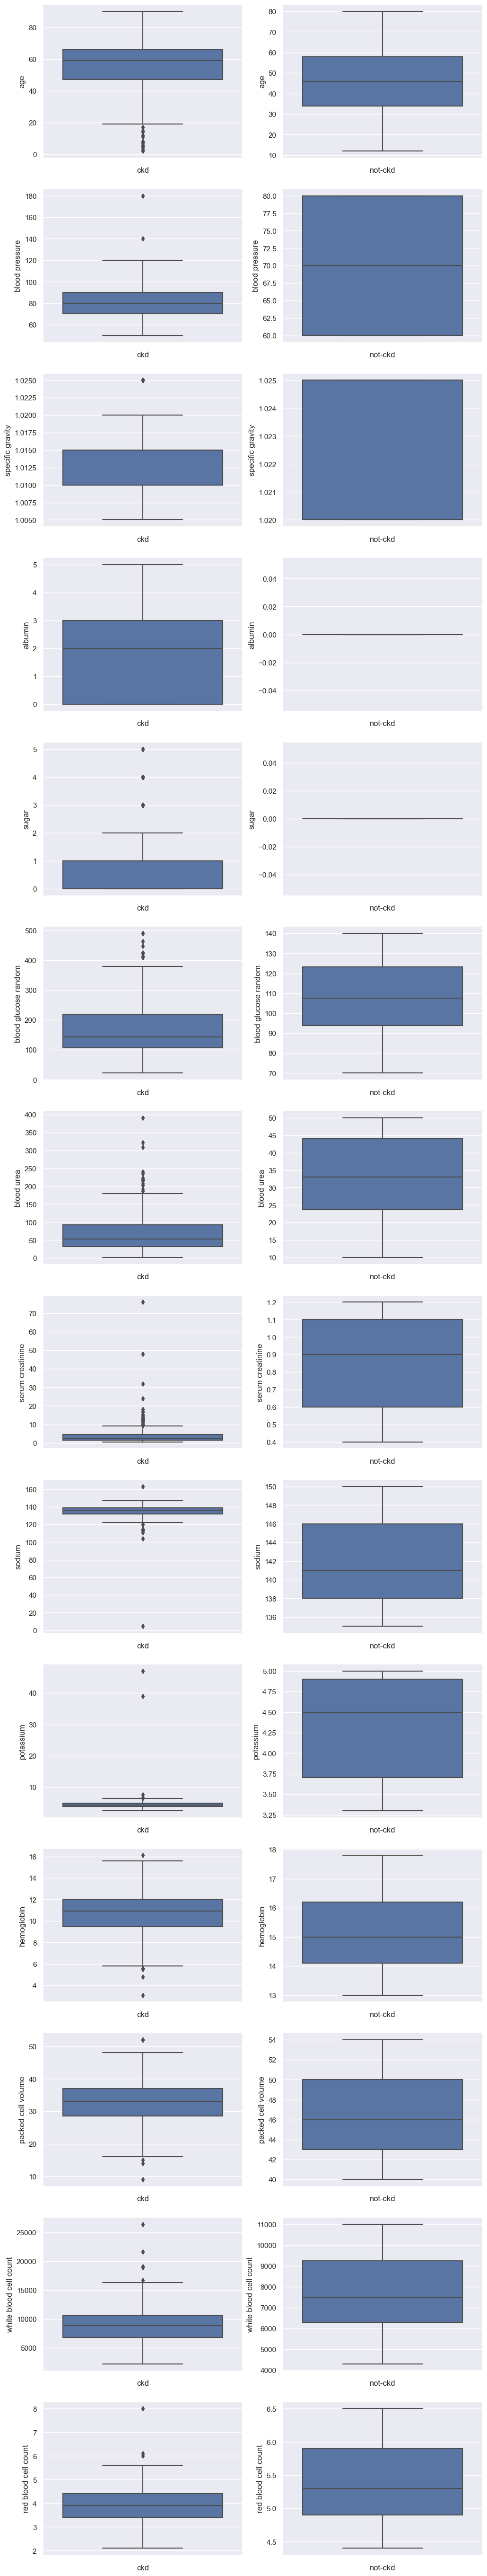

In [9]:
ckd_group = df2[df2['class'] == 'ckd']
non_ckd_group = df2[df2['class'] == 'notckd']
#for passing only the float and int datatype
num_attributes = [col for col in df2.columns if df2[col].dtype == 'float64' or df2[col].dtype == 'int64']

fig, axes = plt.subplots(nrows=len(num_attributes), ncols=2, figsize=(12, 5*len(num_attributes)), sharey=False)

for i, value in enumerate(num_attributes):
    sns.boxplot(y=value, data=ckd_group, ax=axes[i, 0])
    sns.boxplot(y=value, data=non_ckd_group, ax=axes[i, 1])
    axes[i, 0].set_xlabel('ckd')
    axes[i, 1].set_xlabel('not-ckd')



#### By visualization, we can see that the 'albumin' attribute is a high indicator of chronic kidney disease. Whereas the 'potassium' seems to be unrelated to it.

### Multidimensional data filtering and visualization

In [10]:
df = pd.read_csv("winequality-red.csv", sep=';')
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

<Axes: xlabel='quality', ylabel='Count'>

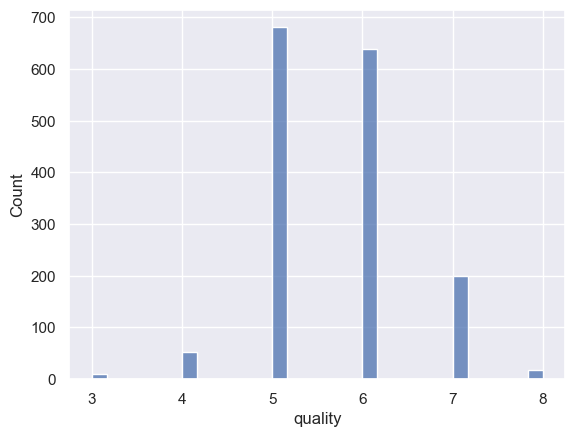

In [11]:
sns.histplot(df, x="quality")

In [12]:
wine_quality = {3:"low",4:"low",5:"medium",6:"medium",7:"high",8:"high"}
df_renamed = df.rename(columns={'quality':'quality bin'})

In [13]:
df_renamed['quality bin'] = df_renamed['quality bin'].map(wine_quality)

In [14]:
df_renamed["quality bin"].head(20)

0     medium
1     medium
2     medium
3     medium
4     medium
5     medium
6     medium
7       high
8       high
9     medium
10    medium
11    medium
12    medium
13    medium
14    medium
15    medium
16      high
17    medium
18       low
19    medium
Name: quality bin, dtype: object

In [15]:
df_renamed.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol quality bin  
0      9.4      medium  
1      9.8      medium  
2      9.8      medium  
3      9.8      medium  
4      9.4      medium  
5      9.4      medium  
6      9.4      medium  
7     10.0        high  
8      9.5        high  
9     10.5      medium

In [16]:
df_quality_filter = df_renamed[(df_renamed["quality bin"] == "low") | (df_renamed["quality bin"] == "high")]

In [24]:
df_quality_filter.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7              7.3             0.650         0.00             1.2      0.065   
8              7.8             0.580         0.02             2.0      0.073   
16             8.5             0.280         0.56             1.8      0.092   
18             7.4             0.590         0.08             4.4      0.086   
37             8.1             0.380         0.28             2.1      0.066   
38             5.7             1.130         0.09             1.5      0.172   
41             8.8             0.610         0.30             2.8      0.088   
45             4.6             0.520         0.15             2.1      0.054   
62             7.5             0.520         0.16             1.9      0.085   
73             8.3             0.675         0.26             2.1      0.084   
79             8.3             0.625         0.20             1.5      0.080   
94             5.0             1.020         0.04             1.4      0.045   
128            8.0             0.590         0.16             1.8      0.065   
151            9.2             0.520         1.00             3.4      0.610   
161            7.6             0.680         0.02             1.3      0.072   
167            7.3             0.550         0.03             1.6      0.072   
170            7.9             0.885         0.03             1.8      0.058   
198            5.4             0.835         0.08             1.2      0.046   
199            6.9             1.090         0.06             2.1      0.061   
200            9.6             0.320         0.47             1.4      0.056   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
7                   15.0                  21.0  0.99460  3.39       0.47   
8                    9.0                  18.0  0.99680  3.36       0.57   
16                  35.0                 103.0  0.99690  3.30       0.75   
18                   6.0                  29.0  0.99740  3.38       0.50   
37                  13.0                  30.0  0.99680  3.23       0.73   
38                   7.0                  19.0  0.99400  3.50       0.48   
41                  17.0                  46.0  0.99760  3.26       0.51   
45                   8.0                  65.0  0.99340  3.90       0.56   
62                  12.0                  35.0  0.99680  3.38       0.62   
73                  11.0                  43.0  0.99760  3.31       0.53   
79                  27.0                 119.0  0.99720  3.16       1.12   
94                  41.0                  85.0  0.99380  3.75       0.48   
128                  3.0                  16.0  0.99620  3.42       0.92   
151                 32.0                  69.0  0.99960  2.74       2.00   
161                  9.0                  20.0  0.99650  3.17       1.08   
167                 17.0                  42.0  0.99560  3.37       0.48   
170                  4.0                   8.0  0.99720  3.36       0.33   
198                 13.0                  93.0  0.99240  3.57       0.85   
199                 12.0                  31.0  0.99480  3.51       0.43   
200                  9.0                  24.0  0.99695  3.22       0.82   

     alcohol quality bin  
7       10.0        high  
8        9.5        high  
16      10.5        high  
18       9.0         low  
37       9.7        high  
38       9.8         low  
41       9.3         low  
45      13.1         low  
62       9.5        high  
73       9.2         low  
79       9.1         low  
94      10.5         low  
128     10.5        high  
151      9.4         low  
161      9.2         low  
167      9.0         low  
170      9.1         low  
198     13.0        high  
199     11.4         low  
200     10.3        high

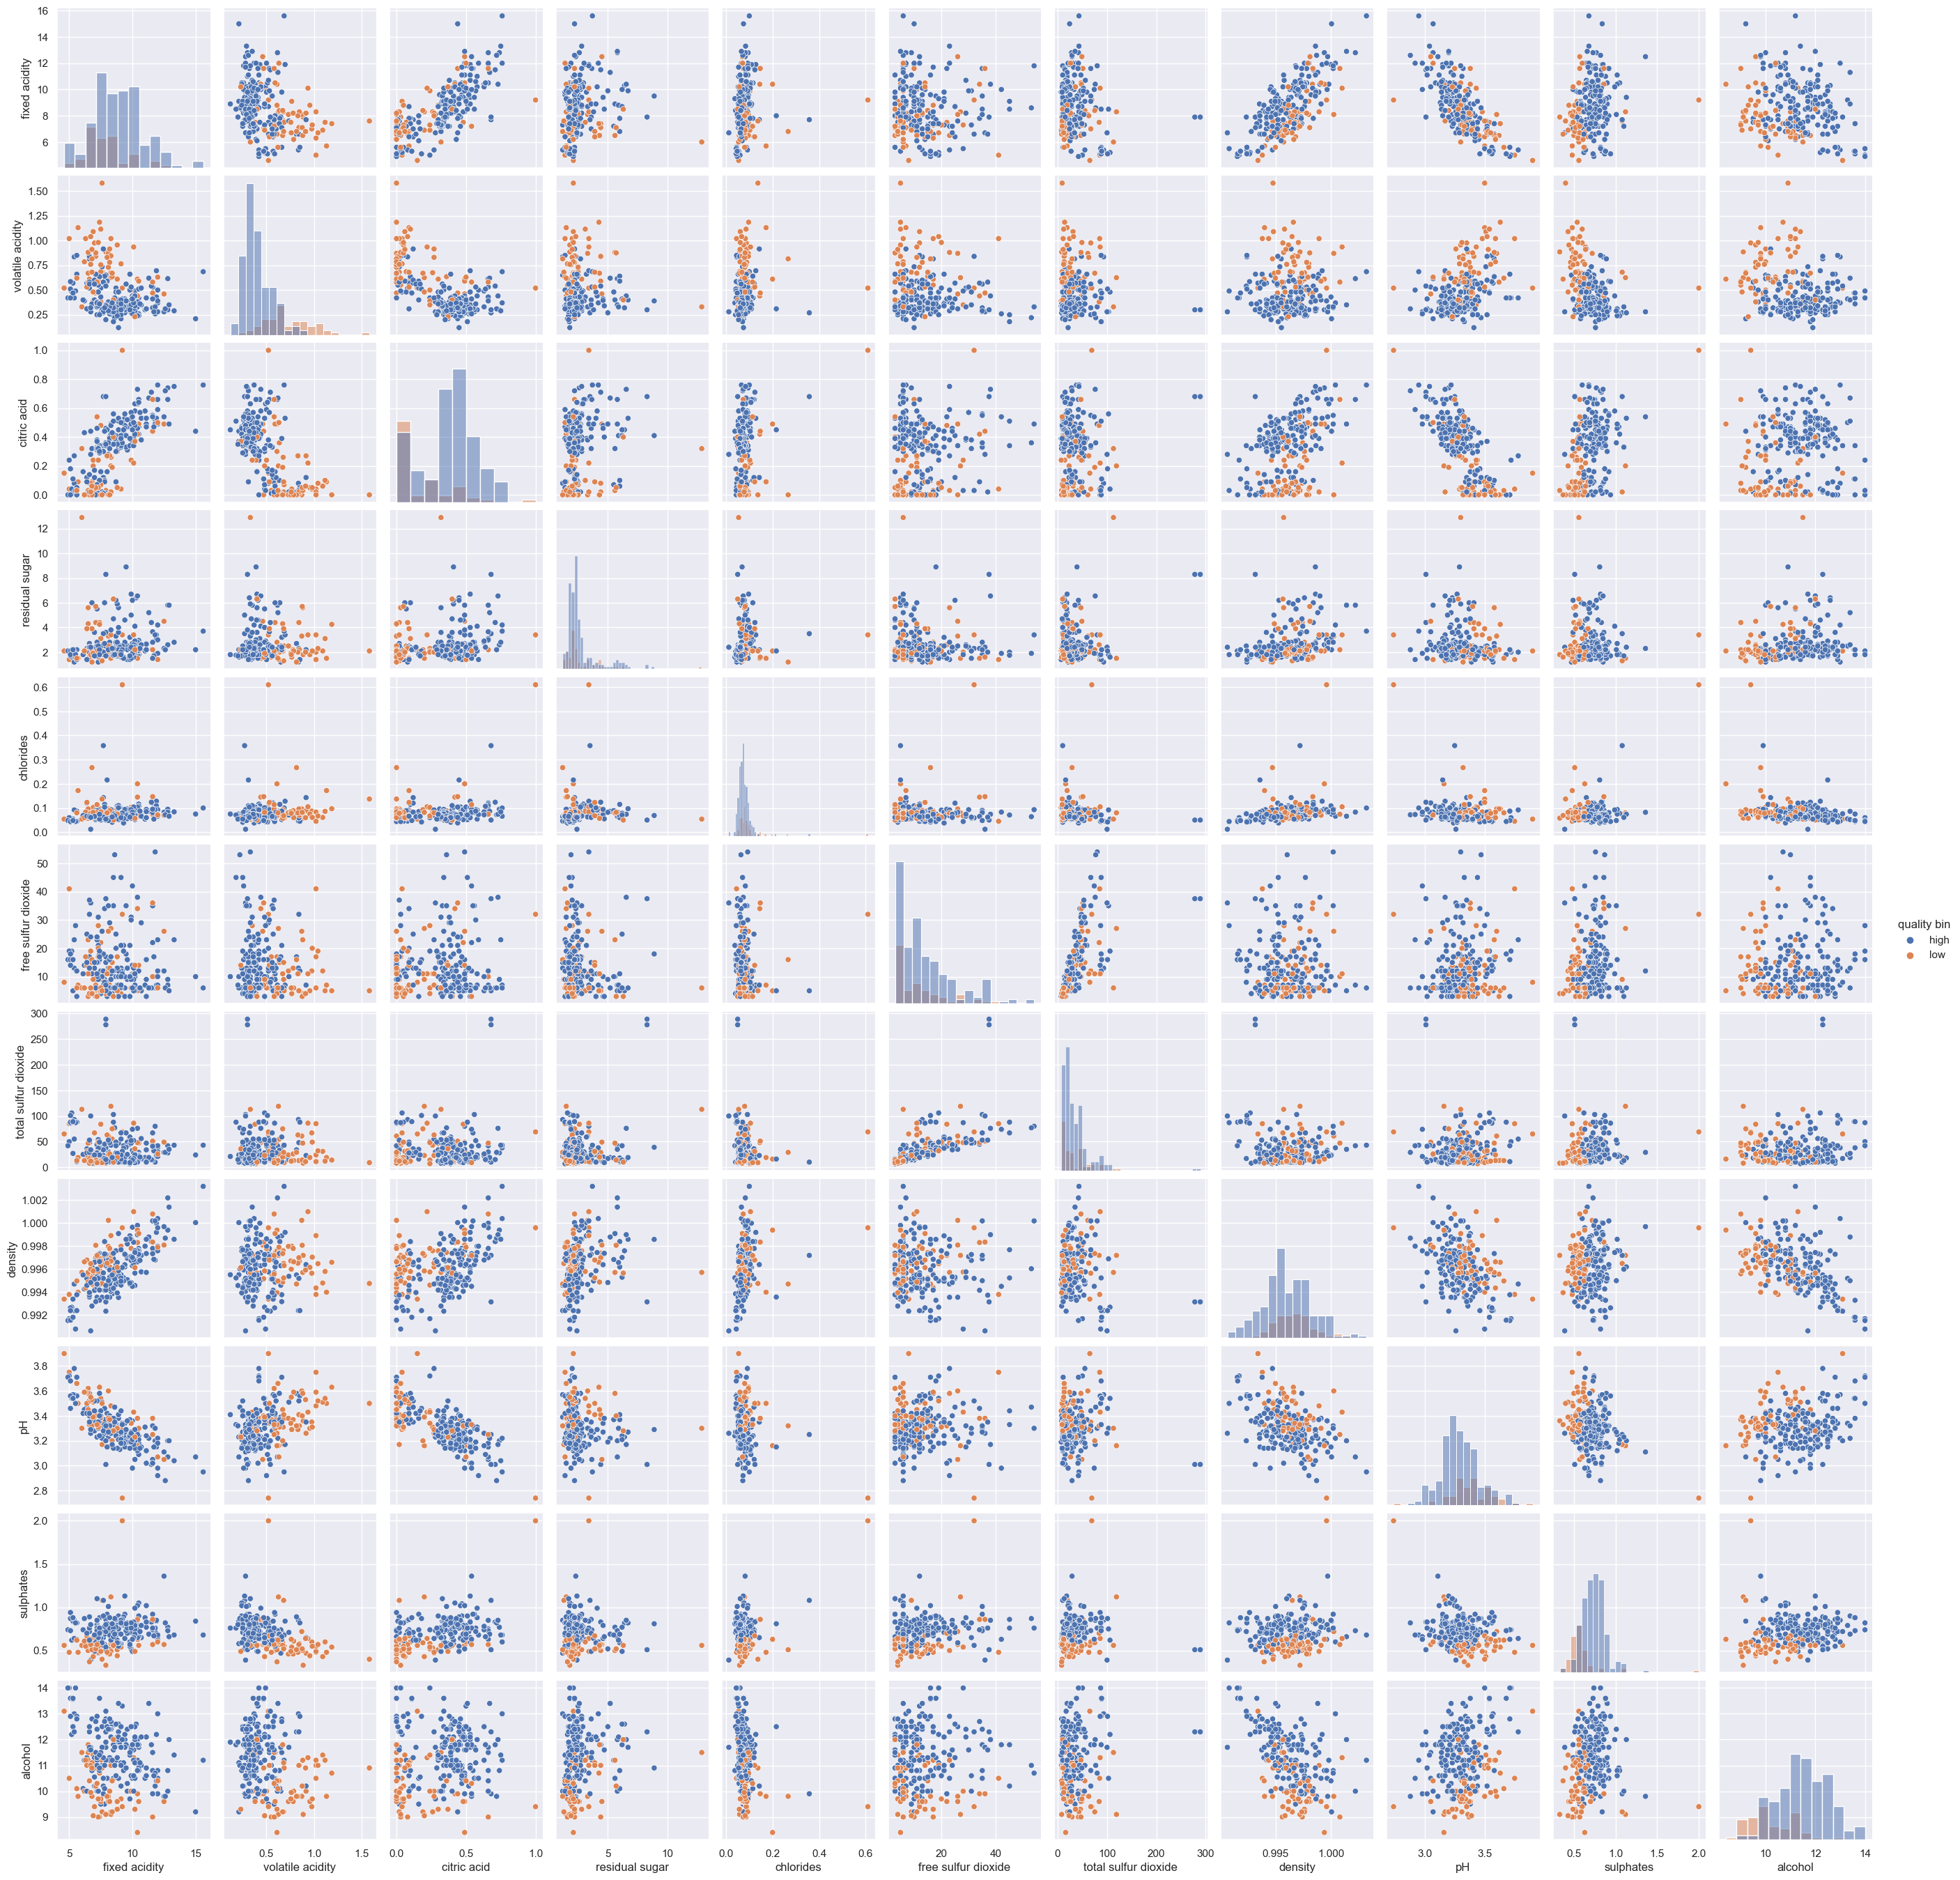

In [25]:
sns.pairplot(data=df_quality_filter, hue="quality bin",diag_kind="hist")

list of attributes that distinguish high quality out of low quality wine:
1. Volatile Acidity
2. Citric Acid
3. PH level
4. Sulphates
5. Alcohol

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [27]:
X = df_quality_filter.iloc[:,0:11]
y = df_quality_filter.iloc[:,11]

In [28]:
selector = SelectKBest(f_classif, k=5)
selector.fit(X,y)
cols = selector.get_support(indices=True)
df_focused = df_quality_filter.iloc[:,cols]

In [29]:
df_focused.head(10)

volatile acidity  citric acid    pH  sulphates  alcohol
7              0.650         0.00  3.39       0.47     10.0
8              0.580         0.02  3.36       0.57      9.5
16             0.280         0.56  3.30       0.75     10.5
18             0.590         0.08  3.38       0.50      9.0
37             0.380         0.28  3.23       0.73      9.7
38             1.130         0.09  3.50       0.48      9.8
41             0.610         0.30  3.26       0.51      9.3
45             0.520         0.15  3.90       0.56     13.1
62             0.520         0.16  3.38       0.62      9.5
73             0.675         0.26  3.31       0.53      9.2

In [41]:
df_focused = df_focused.copy()
df_focused["quality bin"] = df_quality_filter['quality bin']

In [42]:
df_focused

volatile acidity  citric acid    pH  sulphates  alcohol quality bin
7                 0.65         0.00  3.39       0.47    10.00        high
8                 0.58         0.02  3.36       0.57     9.50        high
16                0.28         0.56  3.30       0.75    10.50        high
18                0.59         0.08  3.38       0.50     9.00         low
37                0.38         0.28  3.23       0.73     9.70        high
...                ...          ...   ...        ...      ...         ...
1541              0.25         0.29  3.40       0.76    10.90        high
1544              0.37         0.43  3.17       0.81    11.20        high
1549              0.36         0.30  3.24       0.70    11.40        high
1555              0.56         0.17  3.44       0.68    10.55        high
1584              0.32         0.44  3.29       0.80    11.60        high

[280 rows x 6 columns]

In total, we can see, that attributes, that were chosen, are identical with those after feature selection

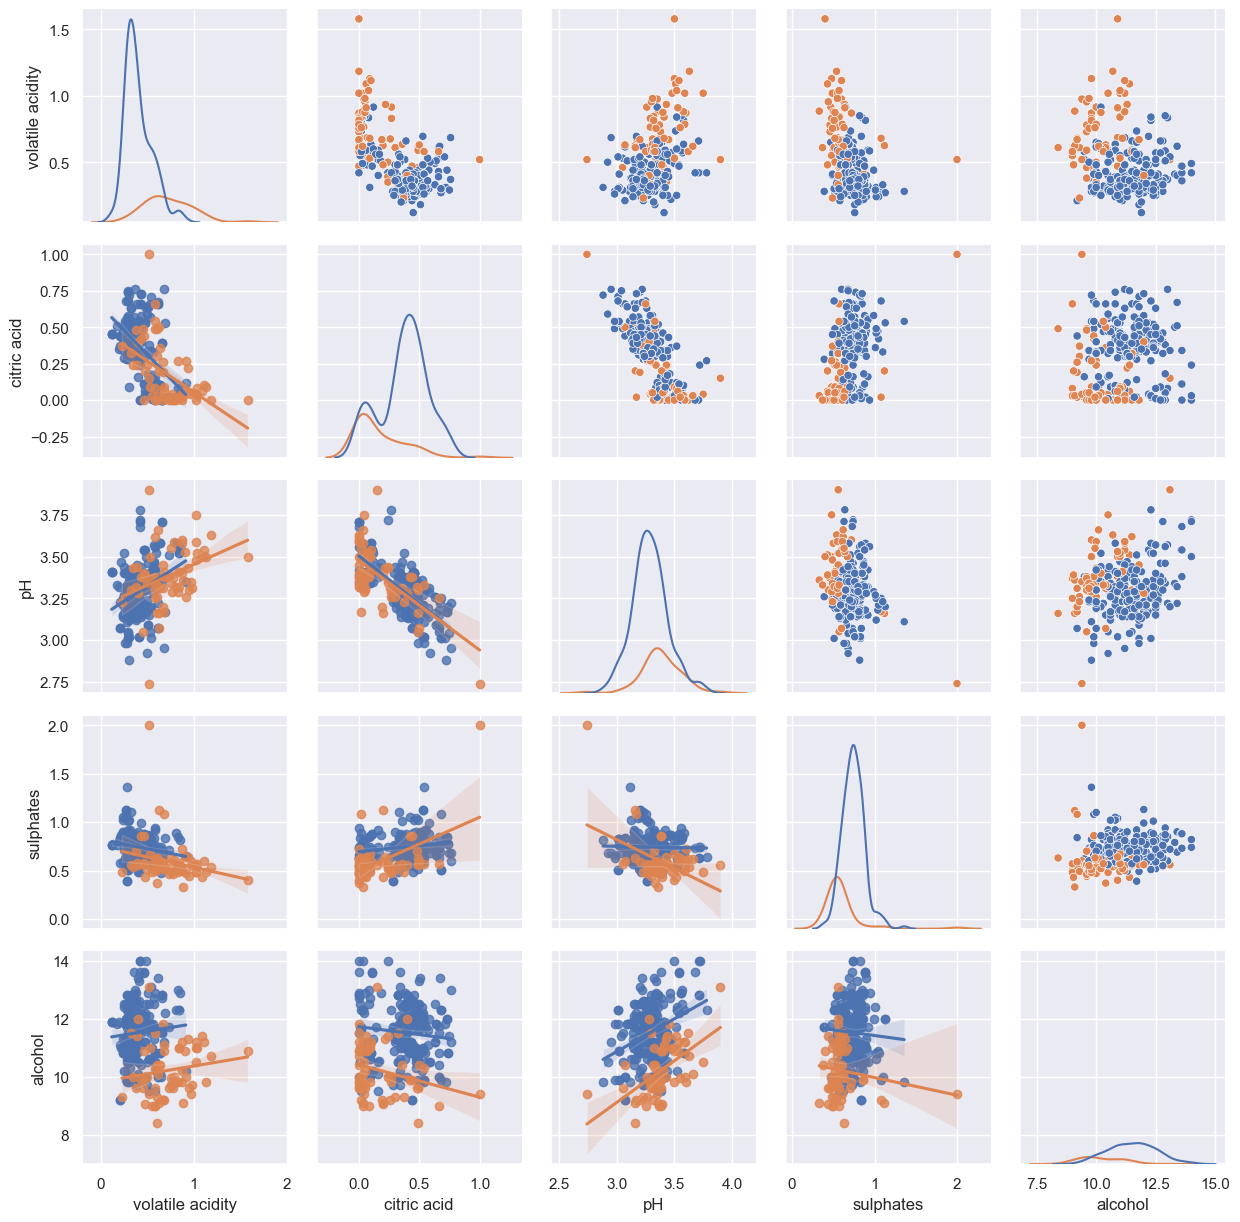

In [32]:
g = sns.PairGrid(df_focused, hue="quality bin")
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.regplot)

Regardless of quality of wine we have Alcohol percentage, PH level and Citric Acid that have strong correlation
At the same time there is Sulphates that has different correlation depending on the wine quality
To my mind, citric acid definitely has multimodal distribution. Moreover, I think that Alcohol percentage can also have multimodal distribution
We can easily see four outliers all in low quality wine. It's:
1. 1.580 volatile acidity
2. 1.0 citric acid
3. 2.74 pH
4. 2.0 sulphates

In [33]:
from numpy import sqrt

def distanceCalc(xA,xB,yA,yB):
    return sqrt(pow((xA-xB),2) + pow((yA-yB),2))

In [34]:
def DSC(highDSC,lowDSC,clustersPoints):
    dscL = dscH = 0
    for i in range(len(highDSC)):
        if (distanceCalc(clustersPoints[0][0],highDSC[i][0],clustersPoints[0][1],highDSC[i][1])) > (distanceCalc(clustersPoints[1][0],highDSC[i][0],clustersPoints[1][1],highDSC[i][1])):
            dscH += 1
           # print(dscH)
  #  print("||")
    for i in range(len(lowDSC)):
        if (distanceCalc(clustersPoints[1][0],lowDSC[i][0],clustersPoints[1][1],lowDSC[i][1])) > (distanceCalc(clustersPoints[0][0],lowDSC[i][0],clustersPoints[0][1],lowDSC[i][1])):
            dscL += 1
           # print(dscL)
    return {(dscH/len(highDSC))*100,(dscL/len(lowDSC))*100}

In [35]:
clusterCenters = df_focused.groupby(["quality bin"]).mean()[:2].values

In [36]:
labels = df_focused.columns.values
lowPoints = df_focused.loc[df_focused["quality bin"] == "low", labels[:5]].values
highPoints = df_focused.loc[df_focused["quality bin"] == "high", labels[:5]].values

In [37]:
for i in range(1,5):
    lowPair = [[]]* len(lowPoints)
    highPair = [[]]* len(highPoints)
    for j in range(len(lowPoints)):
        lowPair[j] = [lowPoints[j][0],lowPoints[j][i]]
    for g in range(len(highPoints)):
        highPair[g] = [highPoints[g][0],highPoints[g][i]]
    firstClusters = [[clusterCenters[0][0],clusterCenters[0][i]],[clusterCenters[1][0],clusterCenters[1][i]]]
    print("pair of: Volatile acidity and ",i,DSC(highPair, lowPair, firstClusters))

pair of: Volatile acidity and  1 {26.984126984126984, 20.737327188940093}
pair of: Volatile acidity and  2 {16.129032258064516, 26.984126984126984}
pair of: Volatile acidity and  3 {14.285714285714285, 22.22222222222222}
pair of: Volatile acidity and  4 {25.806451612903224, 30.158730158730158}


In [38]:
for i in range(2,5):
    lowPair = [[]]* len(lowPoints)
    highPair = [[]]* len(highPoints)
    for j in range(len(lowPoints)):
        lowPair[j] = [lowPoints[j][1],lowPoints[j][i]]
    for g in range(len(highPoints)):
        highPair[g] = [highPoints[g][1],highPoints[g][i]]
    firstClusters = [[clusterCenters[0][1],clusterCenters[0][i]],[clusterCenters[1][1],clusterCenters[1][i]]]
    print("pair of: Citric Acid and ",i,DSC(highPair, lowPair, firstClusters))

pair of: Citric Acid and  2 {28.57142857142857, 22.58064516129032}
pair of: Citric Acid and  3 {22.22222222222222, 23.04147465437788}
pair of: Citric Acid and  4 {25.806451612903224, 28.57142857142857}


In [110]:
for i in range(3,5):
    lowPair = [[]]* len(lowPoints)
    highPair = [[]]* len(highPoints)
    for j in range(len(lowPoints)):
        lowPair[j] = [lowPoints[j][2],lowPoints[j][i]]
    for g in range(len(highPoints)):
        highPair[g] = [highPoints[g][2],highPoints[g][i]]
    firstClusters = [[clusterCenters[0][2],clusterCenters[0][i]],[clusterCenters[1][2],clusterCenters[1][i]]]
    print("pair of: pH and ",i,DSC(highPair, lowPair, firstClusters))

pair of: pH and  3 {21.658986175115206, 15.873015873015872}
pair of: pH and  4 {33.33333333333333, 26.72811059907834}


In [39]:
for i in range(4,5):
    lowPair = [[]]* len(lowPoints)
    highPair = [[]]* len(highPoints)
    for j in range(len(lowPoints)):
        lowPair[j] = [lowPoints[j][3],lowPoints[j][i]]
    for g in range(len(highPoints)):
        highPair[g] = [highPoints[g][3],highPoints[g][i]]
    firstClusters = [[clusterCenters[0][3],clusterCenters[0][i]],[clusterCenters[1][3],clusterCenters[1][i]]]
    print("pair of: Sulphates and ",i,DSC(highPair, lowPair, firstClusters))

pair of: Sulphates and  4 {33.33333333333333, 26.72811059907834}


So in total we can highlight 3 main pairs of arguments:
1. Volatile acidity and Alcohol
2. pH and Alcohol
3. Sulphates and Alcohol

### Evaluating PCP Variants

### a)
in addition to standard PCP, the authors tested the following eight variations:

1. In the first variation, they added scatter plots into standard PCP. They further rotated the scatter plots by 45° on axis labels. They expected that the embedding of the scatter plots to PCP will make it more intuitive to vizualise.

2. In the second variant, they added density based coloring to the polylines of the standard PCP using lookup table(LUT). They expected it to improve visualisation because of the strong visual cue of colors.

3. They changed opacity with respect to density of the polylines to achive blending. Authors expected it to reduce the noise as noise reduction will make the pcps easy to comprehend.

4. In the this variation, authors combined previous two(color, blending) techniques together. According to them ColorBlending should have the properties of both variations hence will prove to be a more better variant.

5. This variation replaces straight lines with curves to improve the clarity and smoothness of the visualization. They expected it to remove ambiguities.

6. Random Tour variation is a rotation of PCPs by animation which shows different angles using time dependent matrix. Authors expected it to perform not as well as non-animated variations because even though it shows new patterns of data to the viewer, it is still difficult to comprehend.

7. Permutation tour is an alternative animation scheme which smoothly cycles through all the permutations, showing all possible axis in an animated fashion. For this, they had same expectations as Random Tour because both of these are animated techniques.

8. In Wobble Variation, polylines wobble around a fixed base position in a sinusoidal way and keeps clusters fairly fixed. Because of its fixed base position, authors expected it to perform better than previous animated techniques.

### b)
Authors did not expected the Color, Blending and ColorBlending variations to perform that badly. To their surprise, scatter plots regardless of their simplicity outperformed every other variation. They were also wrong with placing the standard pcp at last position as it performed 2nd best. However, they guessed quite accurately about the animation related variations(random tour, permutation tour, wobble). 

### c)
If we had to design a visualization with 5 or less dimensions, we'll prefer the color blend variation as it makes the pcp very clear to visualize as long as you have less than 6 dimensions. otherwise, we'll prefer the scatterplot variation as it turned out to be more understandable to the viewers as the findings of Li et al. [LMvW08] and this paper clearly indicates.